# Data Cleaning and Preparation 



In [46]:
# Import Libraries and Packages

import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')


In [47]:
# Load churn dataset into the pandas dataframe

raw_wt_df = pd.read_csv(
    r'C:\Users\romai\OneDrive\WGU\D214 Capstone Project\Project\Data\SCADA_WindTurbine.csv')


In [48]:
# Display Churn DataFrame

display(raw_wt_df[85:89].T)


,85,86,87,88
Date/Time,01 01 2018 14:10,01 01 2018 14:20,01 01 2018 14:30,01 01 2018 14:40
LV ActivePower (kW),1109.128052,1482.459961,1523.430054,1572.170044
Wind Speed (m/s),7.424594,8.186452,8.27493,8.449203
Theoretical_Power_Curve (KWh),1219.199787,1638.508909,1691.147039,1796.76309
Wind Direction (°),235.147293,238.479095,237.033203,238.332397


In [49]:
raw_wt_df.columns = ['Date/Time', 'Power',
                     'Wind_Speed', 'Theoretical_Power', 'Wind_Direction']
display(raw_wt_df[85:89].T)


,85,86,87,88
Date/Time,01 01 2018 14:10,01 01 2018 14:20,01 01 2018 14:30,01 01 2018 14:40
Power,1109.128052,1482.459961,1523.430054,1572.170044
Wind_Speed,7.424594,8.186452,8.27493,8.449203
Theoretical_Power,1219.199787,1638.508909,1691.147039,1796.76309
Wind_Direction,235.147293,238.479095,237.033203,238.332397


In [50]:
# Identify column that contain null values

null_val = raw_wt_df.isnull().any(axis=0)
display(null_val)


Date/Time            False
Power                False
Wind_Speed           False
Theoretical_Power    False
Wind_Direction       False
dtype: bool

In [51]:
raw_wt_df.info(show_counts=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date/Time          object 
 1   Power              float64
 2   Wind_Speed         float64
 3   Theoretical_Power  float64
 4   Wind_Direction     float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [52]:
# Classify variables as Continuous or Categorical datatype

Dtypes = pd.DataFrame(['Continuous' if (raw_wt_df[i].dtypes == int) or (raw_wt_df[i].dtypes == float)
                      else
                       'Categorical' for i in raw_wt_df.columns], raw_wt_df.columns, columns=['Dtype'])
display(Dtypes)


,Dtype
Date/Time,Categorical
Power,Continuous
Wind_Speed,Continuous
Theoretical_Power,Continuous
Wind_Direction,Continuous


In [53]:
# Identify Duplicated Columns
duplicated_col = raw_wt_df.T.duplicated(keep=False)
print('Duplicated Columns \n')
display(duplicated_col)
duplicated_col.value_counts()


Duplicated Columns 



Date/Time            False
Power                False
Wind_Speed           False
Theoretical_Power    False
Wind_Direction       False
dtype: bool

False    5
dtype: int64

In [54]:
# Identify Duplicated Rows
duplicated_row = raw_wt_df.duplicated(keep=False)
print('Duplicated Rows')
display(duplicated_row)
duplicated_row.value_counts()


Duplicated Rows


0        False
1        False
2        False
3        False
4        False
         ...  
50525    False
50526    False
50527    False
50528    False
50529    False
Length: 50530, dtype: bool

False    50530
dtype: int64

In [55]:
# Convert to datetime object and set the index of datetime column

raw_wt_df['Date/Time'] = pd.to_datetime(raw_wt_df['Date/Time'])
raw_wt_df.set_index('Date/Time', inplace=True)


In [56]:
raw_wt_df.head(5)


,Power,Wind_Speed,Theoretical_Power,Wind_Direction
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


Power                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
Wind_Speed           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Theoretical_Power    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Wind_Direction          AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

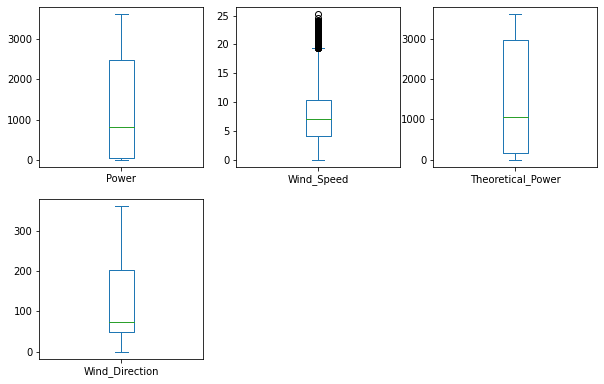

In [57]:
# Plot outliers

raw_wt_df.plot(kind="box", subplots=True, layout=(3, 3), figsize=(10, 10))


In [58]:
raw_wt_df.describe()


,Power,Wind_Speed,Theoretical_Power,Wind_Direction
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


,Power,Wind_Speed,Theoretical_Power,Wind_Direction
count,49896.000000,49896.000000,49896.000000,49896.000000
mean,1283.057929,7.416226,1469.490406,122.805115
std,1297.219012,4.020109,1356.782506,93.644493
min,0.000000,0.000000,0.000000,0.000000
25%,46.459604,4.177718,156.720954,48.993220
50%,803.474670,7.053304,1040.166064,73.066422
75%,2412.981567,10.171310,2894.099526,201.627430
max,3618.732910,18.999981,3600.000000,359.997589


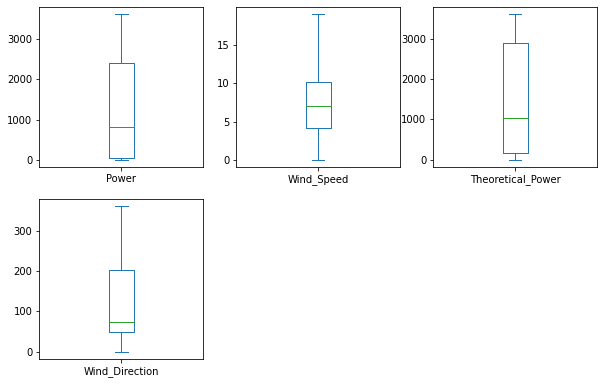

In [59]:
# Remove outlier
clean_wt_df = raw_wt_df[(raw_wt_df.Power >= 0) & (raw_wt_df.Wind_Speed <= 19)]

# Display summary of statistics of cleaned dataset
clean_wt_df.plot(kind="box", subplots=True, layout=(3, 3), figsize=(10, 10))
clean_wt_df.describe()


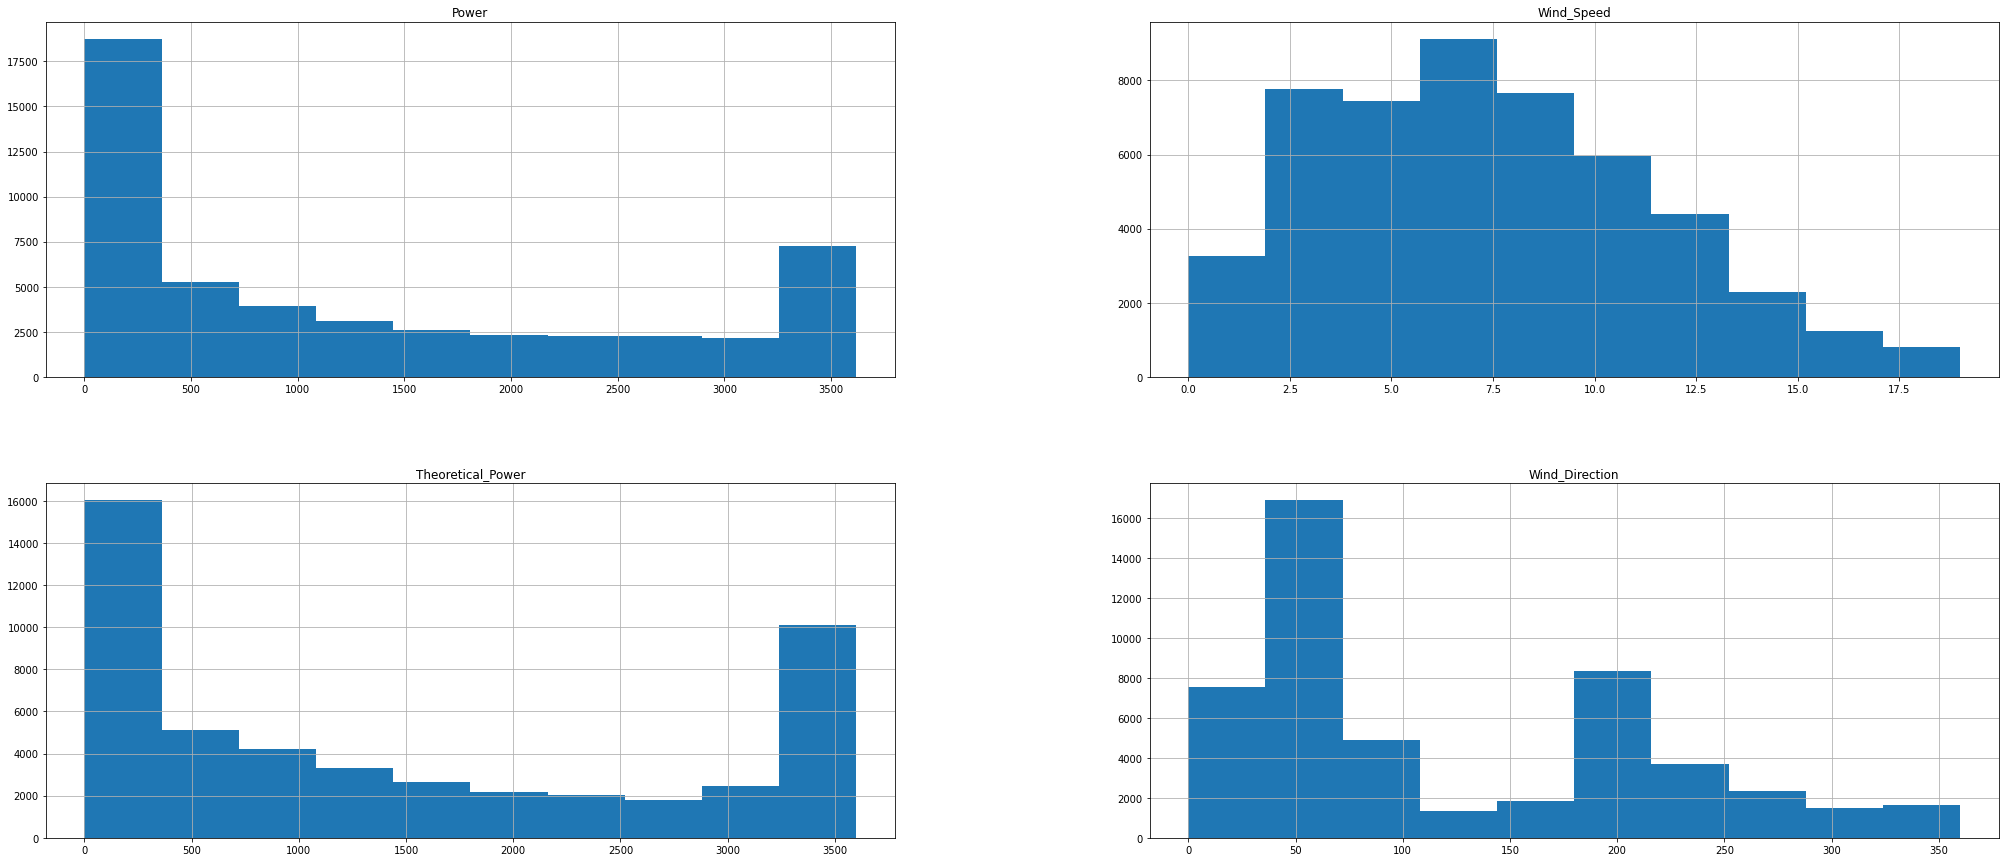

In [60]:
clean_wt_df.hist(figsize=(35, 15))
plt.show()


# Data Analysis

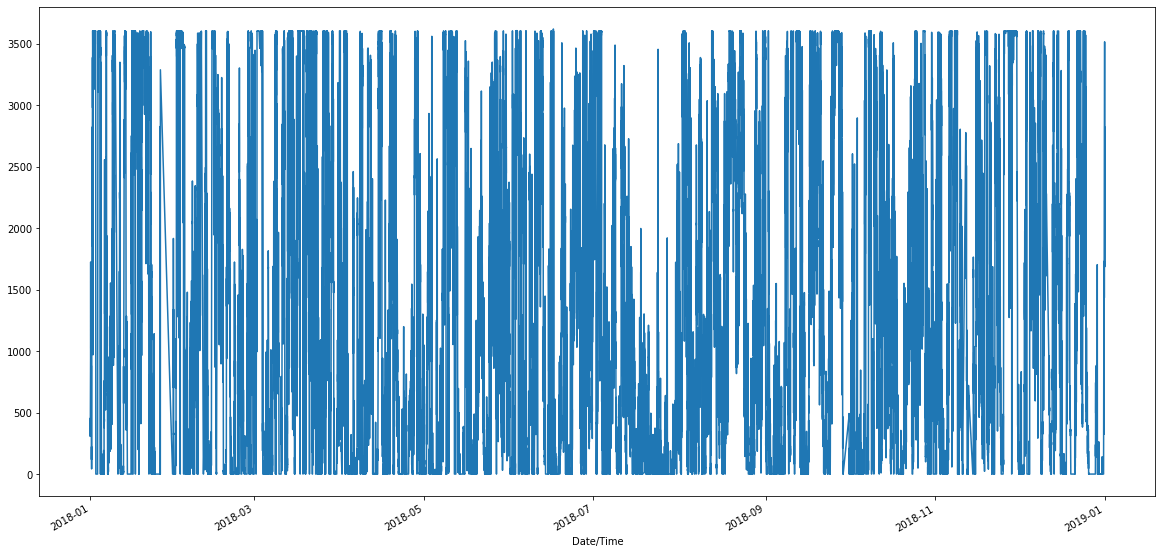

In [61]:

# due to the random noise, the data will be resampled by every hour

clean_wt_df['Power'].plot(figsize=(20, 10))
plt.show()


In [62]:
# create an hourly,daily,weekly,monthly data frame resampled by the mean

hourly = pd.DataFrame()
daily = pd.DataFrame()
weekly = pd.DataFrame()
monthly = pd.DataFrame()

for col in clean_wt_df.columns:
    weekly[col] = clean_wt_df[col].resample('W').mean()

for col in clean_wt_df.columns:
    monthly[col] = clean_wt_df[col].resample('M').mean()

for col in clean_wt_df.columns:
    daily[col] = clean_wt_df[col].resample('D').mean()

for col in clean_wt_df.columns:
    hourly[col] = clean_wt_df[col].resample('H').mean()


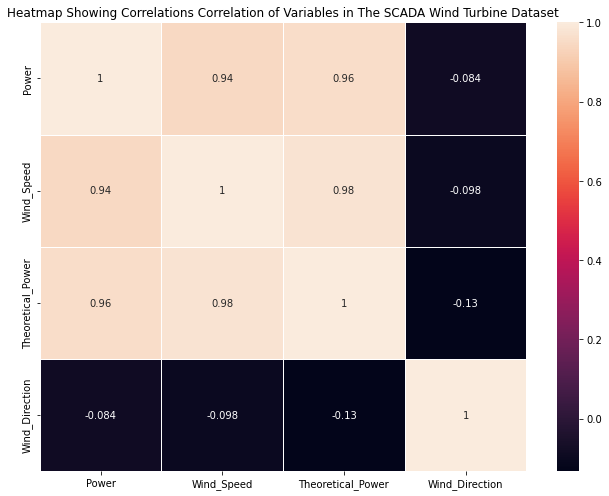

In [63]:
# Correlation Heatmap

fig, ax = plt.subplots(1, 1, figsize=(9, 7))
sns.heatmap(daily.corr(), annot=True, linewidth=0.5)
plt.title('Heatmap Showing Correlations Correlation of Variables in The SCADA Wind Turbine Dataset')
plt.tight_layout()
plt.show()


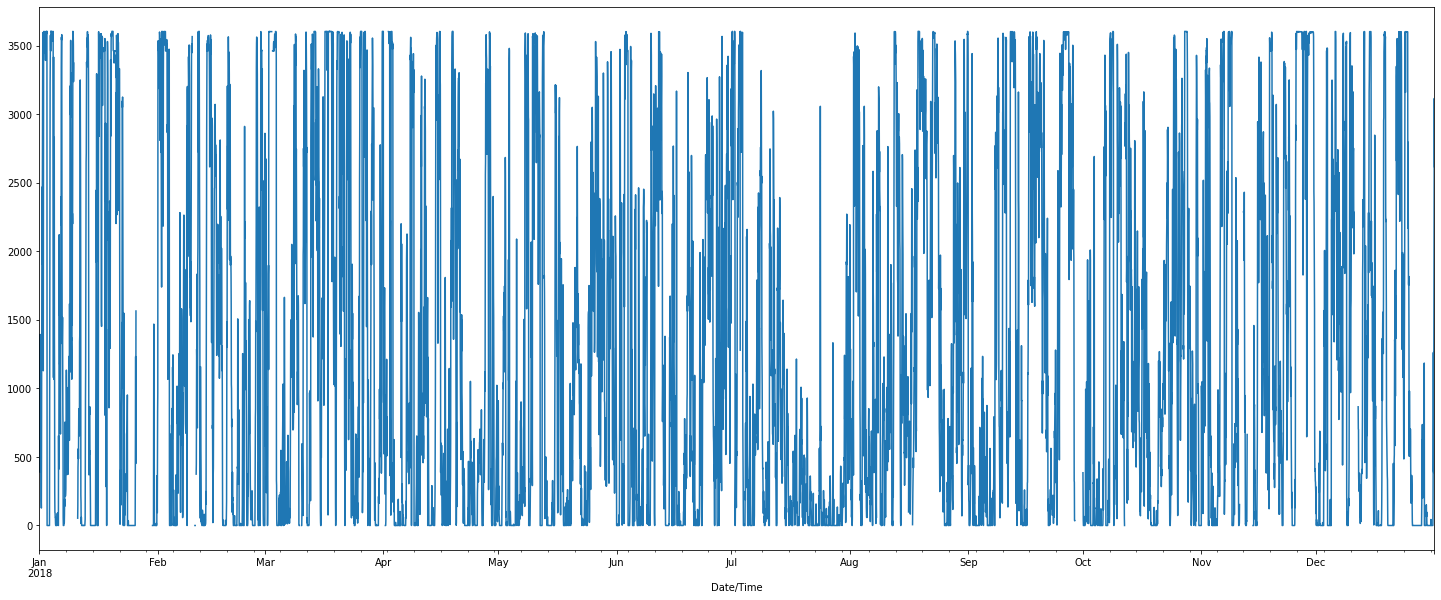

In [64]:
# Average power generate hourly

hourly['Power'].plot(figsize=(25, 10))
plt.show()


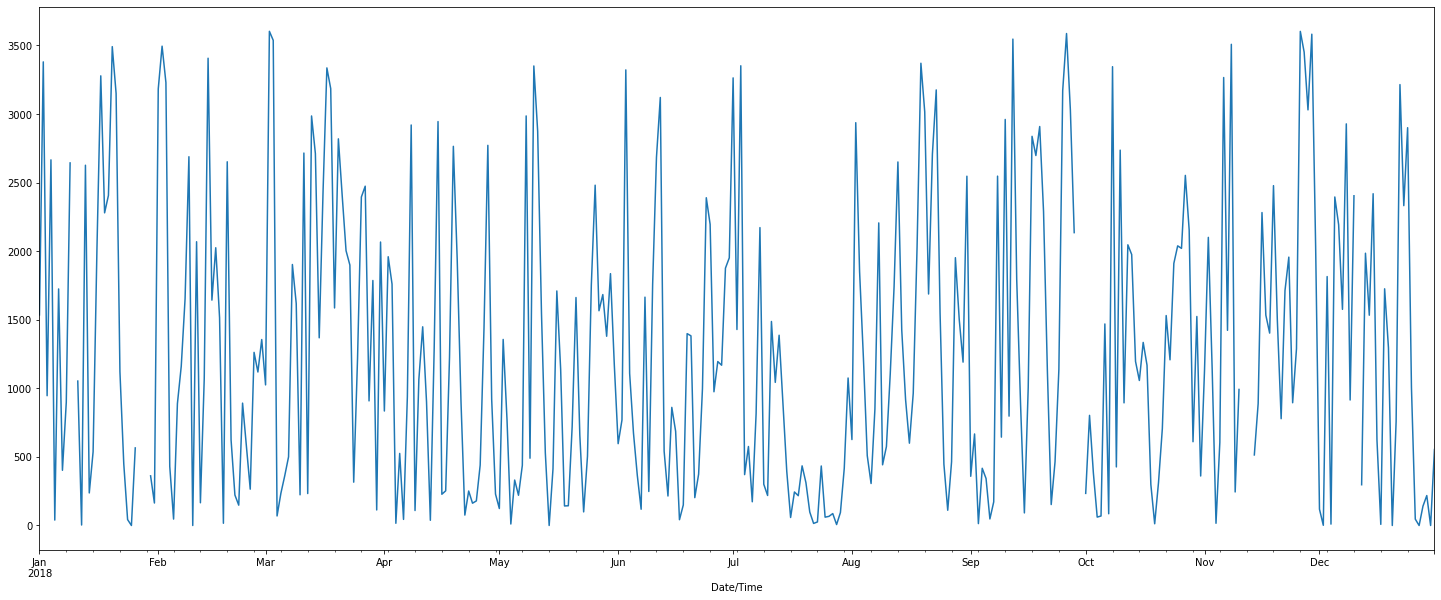

In [65]:
# Average power generate daily

daily['Power'].plot(figsize=(25, 10))
plt.show()


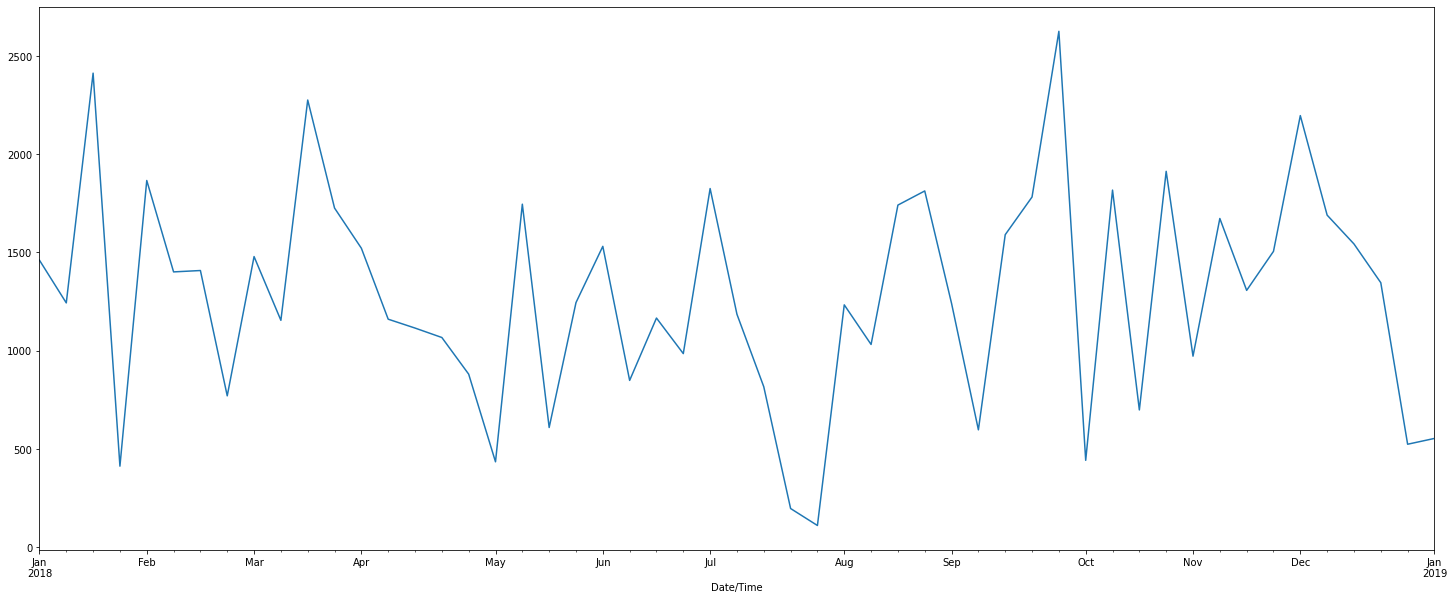

In [66]:
# Average power generate weekly

weekly['Power'].plot(figsize=(25, 10))
plt.show()


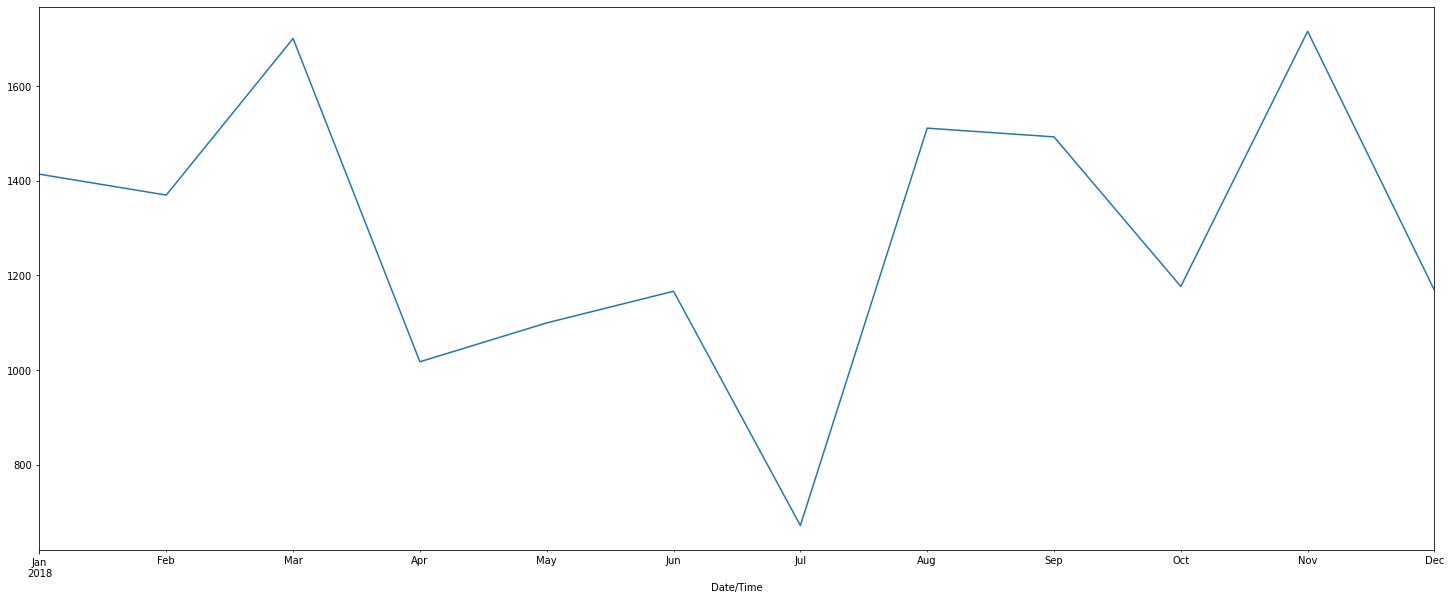

In [67]:
# Average power generate monthly

monthly['Power'].plot(figsize=(25, 10))
plt.show()


<AxesSubplot:xlabel='Wind_Speed'>

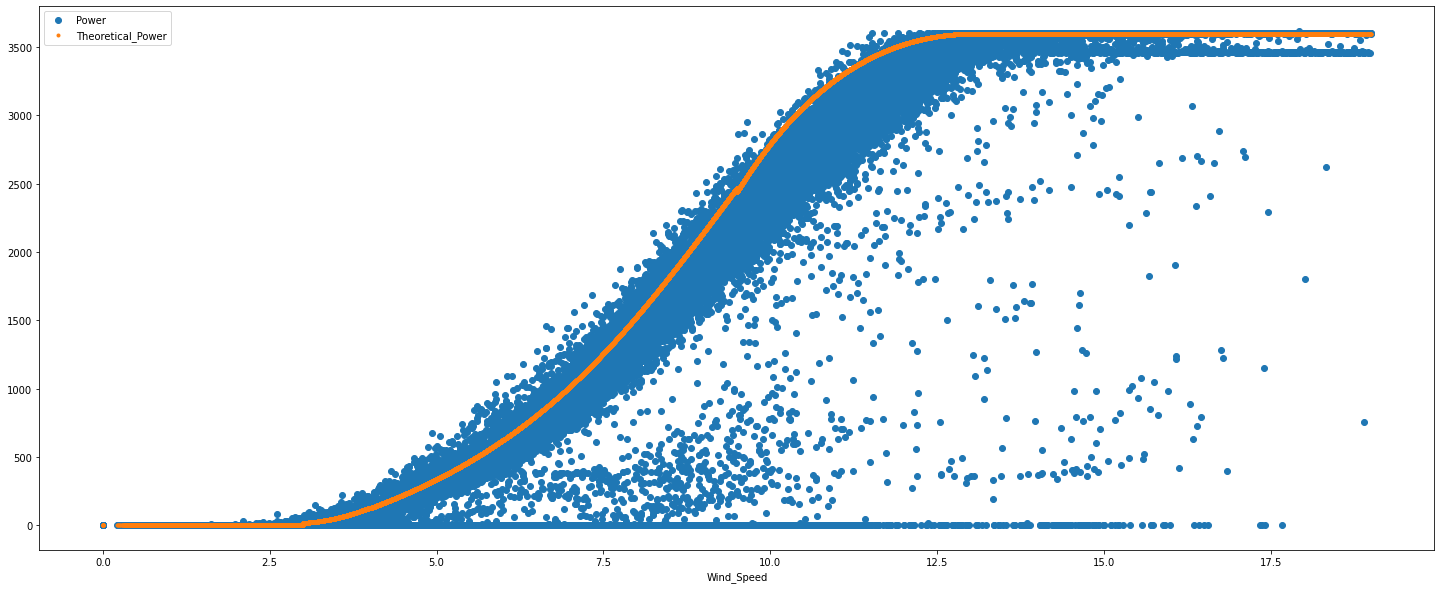

In [68]:
# Power Curve

TPvAP = clean_wt_df.plot(x='Wind_Speed', y='Power',
                         style='o', figsize=(25, 10))
clean_wt_df.plot(x='Wind_Speed', y='Theoretical_Power', style='.', ax=TPvAP)


In [69]:
# Mean wind speed
def mean_wind(x):
    intervals = [*np.arange(0.25, 26, 0.5)]

    for i in intervals:
        if x < i:
            x = i-0.25
            return x


In [70]:
clean_wt_df['Mean_speed'] = clean_wt_df['Wind_Speed'].apply(mean_wind)


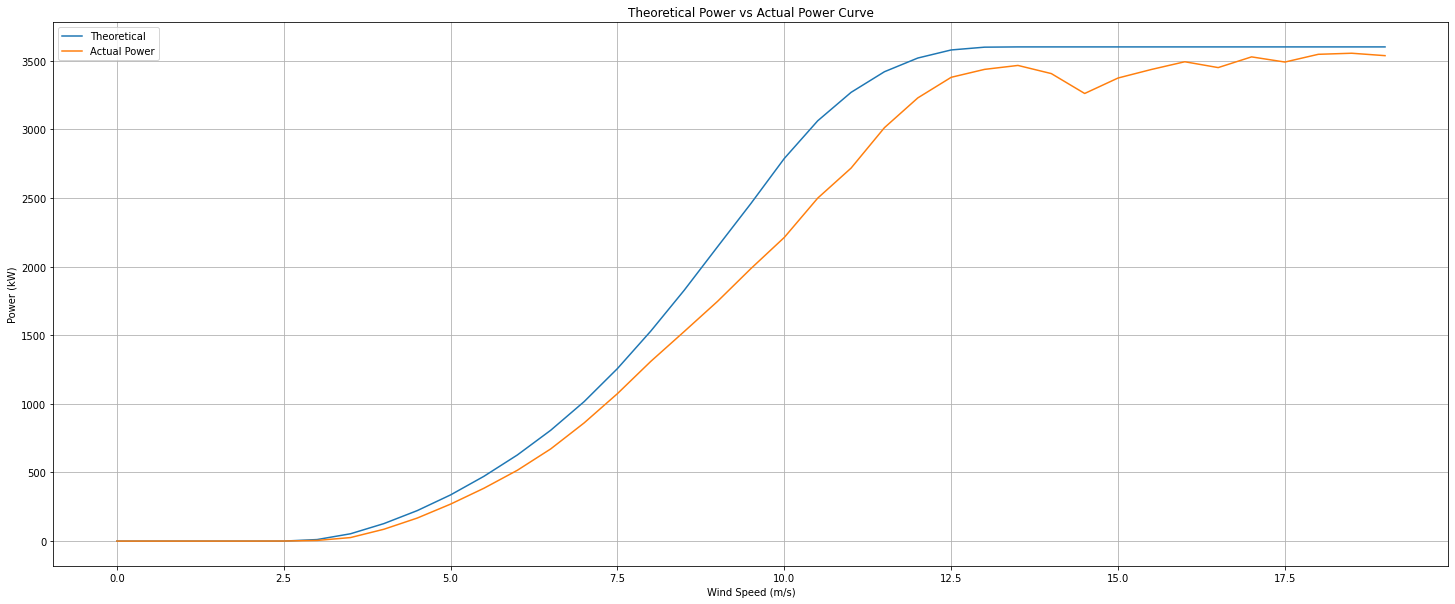

In [71]:
m_s_t_se = clean_wt_df.groupby('Mean_speed')['Theoretical_Power'].mean()
m_s_p_se = clean_wt_df.groupby('Mean_speed')['Power'].mean()
plt.figure(figsize=(25, 10))
plt.tight_layout()
plt.plot(m_s_t_se, label='Theoretical')
plt.plot(m_s_p_se, label='Actual Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
plt.title('Theoretical Power vs Actual Power Curve')
plt.grid(which='major')
plt.legend()
plt.show()


In [72]:
# create a function for a categorical column
def direction(x):
    if x > 348.75 or x < 11.25:
        return 'N'
    if x < 33.75:
        return 'NNE'
    if x < 56.25:
        return 'NE'
    if x < 78.75:
        return 'ENE'
    if x < 101.25:
        return 'E'
    if x < 123.75:
        return 'ESE'
    if x < 146.25:
        return 'SE'
    if x < 168.75:
        return 'SSE'
    if x < 191.25:
        return 'S'
    if x < 213.75:
        return 'SSW'
    if x < 236.25:
        return 'SW'
    if x < 258.75:
        return 'WSW'
    if x < 281.25:
        return 'W'
    if x < 303.75:
        return 'WNW'
    if x < 326.25:
        return 'NW'
    else:
        return 'NNW'


In [73]:
clean_wt_df['Direction'] = clean_wt_df['Wind_Direction'].apply(direction)


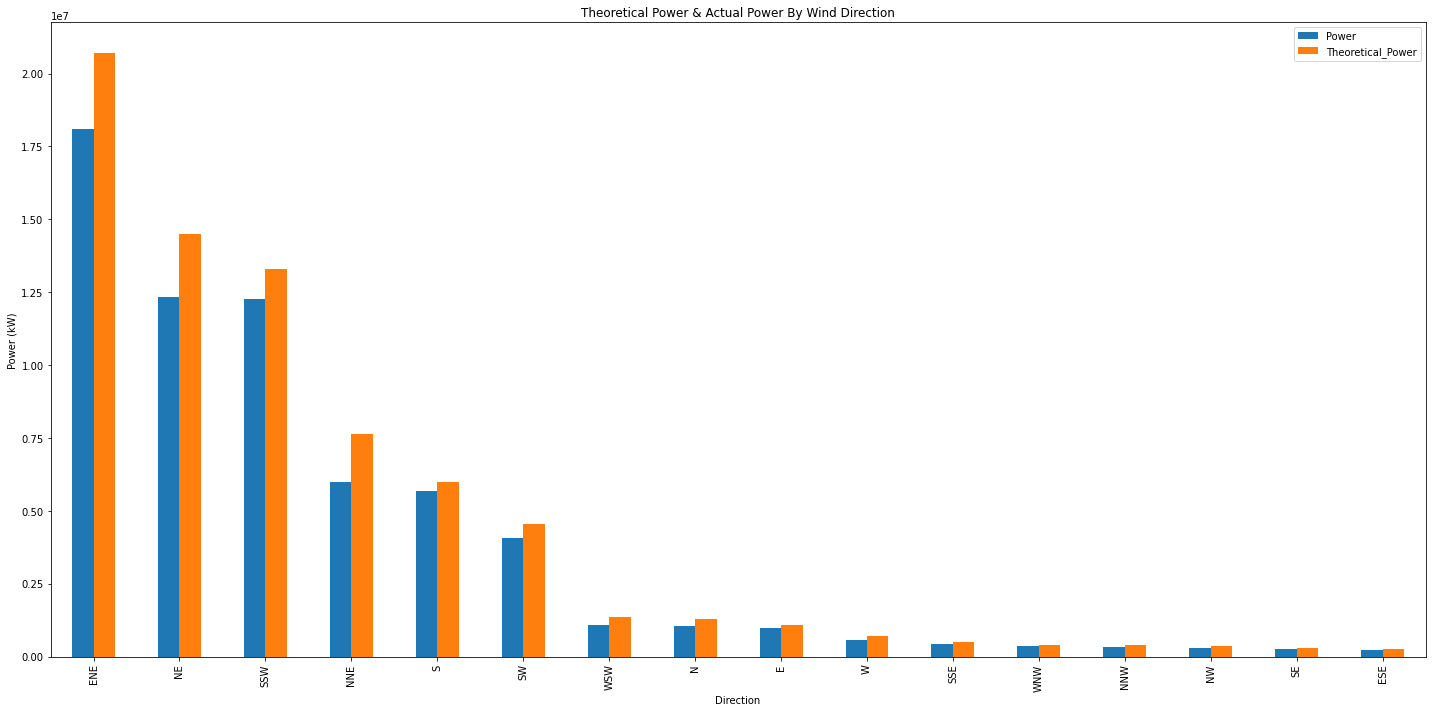

In [74]:
# Power generate by wind direction

direction_df = clean_wt_df.groupby(
    'Direction')[['Power', 'Theoretical_Power']].sum()
direction_df = direction_df.sort_values(by=['Power'], ascending=False)
direction_df.plot(kind='bar', figsize=(20, 10))
plt.title('Theoretical Power & Actual Power By Wind Direction')
plt.ylabel('Power (kW)')
plt.tight_layout()
plt.show()


# Statistical Model

In [75]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Features and target: use only wind direction and wind speed
X = clean_wt_df[['Wind_Direction', 'Wind_Speed']]
y = clean_wt_df['Power']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Make pipeline
pipe = make_pipeline(StandardScaler(), SVR())


In [76]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Fit SVM model
# pipe.fit(X_train, y_train)

# # Predict on test set
# y_pred = pipe.predict(X_test)


In [78]:
# # Fit SVM model
pipe.fit(X_train, y_train)

# Entire data
y_pred_all = pipe.predict(X)

# Predicted power into dataframe
y_pred = pd.DataFrame(y_pred_all, columns=['Power'])
y_pred.index = y.index

display(y_pred)


,Power
Date/Time,
2018-01-01 00:00:00,357.265390
2018-01-01 00:10:00,459.770317
2018-01-01 00:20:00,330.312087
2018-01-01 00:30:00,455.505353
2018-01-01 00:40:00,432.163539
...,...
2018-12-31 23:10:00,3046.857687
2018-12-31 23:20:00,1059.330507
2018-12-31 23:30:00,1597.904395


In [79]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R Sqaured', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [80]:
test_pred = pipe.predict(X_test)
train_pred = pipe.predict(X_train)

print('Test set evaluation:\n_____________________________________ \n')
print_evaluate(y_test, test_pred)

print('\nTrain set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________ 

MAE: 169.15089737603364
MSE: 161506.4344051624
RMSE: 401.8786314363609
R Sqaured 0.9025068079019662

Train set evaluation:
_____________________________________
MAE: 171.87185160373144
MSE: 166460.75790548223
RMSE: 407.996026825608
R Sqaured 0.9017275793757568


In [81]:
svm_results = pd.DataFrame(data=[["SVM Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R Squared'])

display(svm_results)

,Model,MAE,MSE,RMSE,R Squared
0,SVM Regression,169.150897,161506.434405,401.878631,0.902507


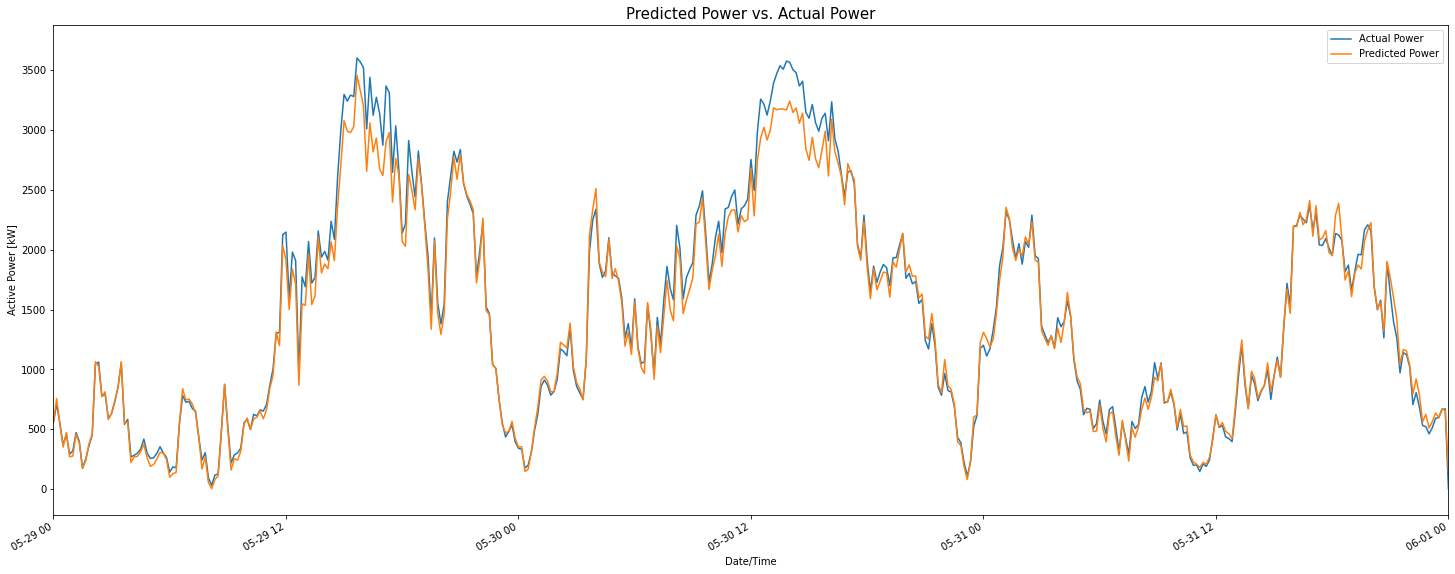

In [82]:
# True Power (blue) vs. Predicted Power (orange)
t = clean_wt_df.index
ax = y.plot(figsize=(25, 10), xlim=(np.datetime64('2018-05-29'),
            np.datetime64('2018-06-01')))  # type: ignore
y_pred.plot(figsize=(25, 10), xlim=(np.datetime64('2018-05-29'),
            np.datetime64('2018-06-01')), ax=ax)  # type: ignore
plt.title('Predicted Power vs. Actual Power', size=15)
plt.ylabel('Active Power [kW]')
plt.legend(['Actual Power', 'Predicted Power'])
